# Data 512 HW 1 (Raviprakash Rthvik, Student ID: 2272104, Email: rravipra@uw.edu)

# Article Page Views API Example
This example illustrates how to access page view data using the [Wikimedia REST API](https://www.mediawiki.org/wiki/Wikimedia_REST_API). This example shows how to request monthly counts of page views for one specific article. The API documentation, [pageviews/per-article](https://wikimedia.org/api/rest_v1/#/Pageviews%20data), covers additional details that may be helpful when trying to use or understand this example.

## License
This code example was developed by Dr. David W. McDonald for use in DATA 512, a course in the UW MS Data Science degree program. This code is provided under the [Creative Commons](https://creativecommons.org) [CC-BY license](https://creativecommons.org/licenses/by/4.0/). Revision 1.2 - August 14, 2023

In [11]:
#
# These are standard python modules
import json, time, urllib.parse
#
# The 'requests' module is not a standard Python module. You will need to install this with pip/pip3 if you do not already have it
import requests

The example relies on some constants that help make the code a bit more readable.

# INITIALIZING CONSTANTS

In [12]:
#########
#
#    CONSTANTS
#

# The REST API 'pageviews' URL - this is the common URL/endpoint for all 'pageviews' API requests
API_REQUEST_PAGEVIEWS_ENDPOINT = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'

# This is a parameterized string that specifies what kind of pageviews request we are going to make
# In this case it will be a 'per-article' based request. The string is a format string so that we can
# replace each parameter with an appropriate value before making the request
API_REQUEST_PER_ARTICLE_PARAMS = 'per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'

# The Pageviews API asks that we not exceed 100 requests per second, we add a small delay to each request
API_LATENCY_ASSUMED = 0.002       # Assuming roughly 2ms latency on the API and network
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED

# When making a request to the Wikimedia API they ask that you include your email address which will allow them
# to contact you if something happens - such as - your code exceeding rate limits - or some other error
REQUEST_HEADERS = {
    'User-Agent': '<uwnetid@uw.edu>, University of Washington, MSDS DATA 512 - AUTUMN 2023',
}

# This is just a list of English Wikipedia article titles that we can use for example requests
ARTICLE_TITLES = [ 'Bison', 'Northern flicker', 'Red squirrel', 'Chinook salmon', 'Horseshoe bat' ]

# This template is used to map parameter values into the API_REQUST_PER_ARTICLE_PARAMS portion of an API request. The dictionary has a
# field/key for each of the required parameters. In the example, below, we only vary the article name, so the majority of the fields
# can stay constant for each request. Of course, these values *could* be changed if necessary.
ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "desktop",      # this should be changed for the different access types (in this case we use it for desktop)
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015010100",   # start and end dates need to be set
    "end":         "2023093000"
}

ARTICLE_PAGEVIEWS_PARAMS_MOBILE_APP_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "mobile-app",      # this should be changed for the different access types (in this case we use it for mobile-app)
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015010100",
    "end":         "2023093000"
}

ARTICLE_PAGEVIEWS_PARAMS_MOBILE_WEB_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "mobile-web",      # this should be changed for the different access types (in this case we use it for mobile-web)
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015010100",
    "end":         "2023093000"
}

ARTICLE_PAGEVIEWS_PARAMS_CUMULATIVE_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "all-access",      # this should be changed for the different access types (in this case we use it for all-access)
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015010100",
    "end":         "2023093000"
}


The API request will be made using one procedure. The idea is to make this reusable. The procedure is parameterized, but relies on the constants above for the important parameters. The underlying assumption is that this will be used to request data for a set of article pages. Therefore the parameter most likely to change is the article_title.

# PROCEDURES/FUNCTIONS

In [13]:
#########
#
#    PROCEDURES/FUNCTIONS
#

def request_pageviews_per_article(article_title = None,
                                  endpoint_url = API_REQUEST_PAGEVIEWS_ENDPOINT,
                                  endpoint_params = API_REQUEST_PER_ARTICLE_PARAMS,
                                  request_template = ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE,
                                  headers = REQUEST_HEADERS):

    # article title can be as a parameter to the call or in the request_template
    if article_title:
        request_template['article'] = article_title

    if not request_template['article']:
        raise Exception("Must supply an article title to make a pageviews request.")

    # Titles are supposed to have spaces replaced with "_" and be URL encoded
    article_title_encoded = urllib.parse.quote(request_template['article'].replace(' ','_'), safe = '')
    request_template['article'] = article_title_encoded

    # now, create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url+endpoint_params.format(**request_template)

    # make the request
    try:
        # we'll wait first, to make sure we don't exceed the limit in the situation where an exception
        # occurs during the request processing - throttling is always a good practice with a free
        # data source like Wikipedia - or other community sources
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response


In [14]:
print("Getting pageview data for: ",ARTICLE_TITLES[1])
views = request_pageviews_per_article(ARTICLE_TITLES[1])

Getting pageview data for:  Northern flicker


# An Example of how the dictionary format looks for the data extracted from the API

In [15]:
#print(json.dumps(views,indent=4))
print("Have %d months of pageview data"%(len(views['items'])))
for month in views['items']:
    print(json.dumps(month,indent=4))

Have 99 months of pageview data
{
    "project": "en.wikipedia",
    "article": "Northern_flicker",
    "granularity": "monthly",
    "timestamp": "2015070100",
    "access": "desktop",
    "agent": "user",
    "views": 4018
}
{
    "project": "en.wikipedia",
    "article": "Northern_flicker",
    "granularity": "monthly",
    "timestamp": "2015080100",
    "access": "desktop",
    "agent": "user",
    "views": 3116
}
{
    "project": "en.wikipedia",
    "article": "Northern_flicker",
    "granularity": "monthly",
    "timestamp": "2015090100",
    "access": "desktop",
    "agent": "user",
    "views": 4802
}
{
    "project": "en.wikipedia",
    "article": "Northern_flicker",
    "granularity": "monthly",
    "timestamp": "2015100100",
    "access": "desktop",
    "agent": "user",
    "views": 5373
}
{
    "project": "en.wikipedia",
    "article": "Northern_flicker",
    "granularity": "monthly",
    "timestamp": "2015110100",
    "access": "desktop",
    "agent": "user",
    "views": 

All of the code above I have used from [example notebook](https://drive.google.com/file/d/1XjFhd3eXx704tcdfQ4Q1OQn0LWKCRNJm/view?usp=sharing) with slight modifications like adding templates for Mobile-web, Mobile-app and cumulative (all-access) where only the template for Desktop was provided. The code in the example notebook has been licensed by [license](https://creativecommons.org/licenses/by/4.0/).

Importing all the required libraries for Data Acquisition, Processing and Analysis

In [16]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Acquisition

An excel spreadsheet/dataset was provided by Dr. David W. McDonald for use in this same course: DATA 512. The file (thank_the_academy.AUG.2023.csv.xlsx) contains two columns has the following columns: 'name' and 'url', where the 'name' column consists of the names of the articles and the 'url' column consists of the wikipedia url for a given article. Here is a link to the data: [Data](https://docs.google.com/spreadsheets/d/1A1h_7KAo7KXaVxdScJmIVPTvjb3IuY9oZhNV4ZHxrxw/edit#gid=1229854301)

Step 1.1: Load Data

Load the data into a Pandas DataFrame

In [17]:
df = pd.read_excel("/content/drive/MyDrive/512_Homework_1/Homework_1/thank_the_academy.AUG.2023.csv.xlsx")

Step 1.2: Extract the names of the movies from the DataFrame as a list so that we can loop over each movie name to extract the information for it.

In [18]:
movie_names = df['name'].tolist()

Step 1.3: Extract the data using the 'request_pageviews_per_article' function that we have implemented above in the PROCEDURES/FUNCTIONS section. The function will only extract the data for a given article, but we loop over all the article names and extract that data for all and save it in a JSON file.

Acquiring the data for Monthly Desktop access and saving it as a JSON file.

In [19]:
# Acquiring data for monthly desktop access

# Create a dictionary that will contain all the data from all articles
# with the article names as keys.
all_views = {}

# Loop over each movie_name (i.e., article)
for movie_name in movie_names:
    print("Getting pageview data for:", movie_name)

    # Use the 'request_pageviews_per_article' function with the movie_name
    # as a parameter to acquire the data for that particular movie/article.
    views = request_pageviews_per_article(movie_name)

    for di in views['items']:
        # Delete the 'access' field since it can be misleading for
        # mobile and cumulative fields.
        del di['access']

    # Using movie_name as a key (i.e., article as a key), store the data
    # for that article (i.e., for a given article as a key, the value would
    # be a list of dictionaries of the data for that article where each
    # dictionary will consist of the data on a particular timestamp for
    # that article).
    all_views[movie_name] = views['items']

# Assign the filename based on the dates
# Format: academy_monthly_mobile_<startYYYYMM>-<endYYYYMM>.json
filename = 'academy_monthly_desktop_' + ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE['start'][:-4] + '-' + ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE['end'][:-4] + '.json'

# Save the data as a JSON file
with open(filename, 'w') as outfile:
    json.dump(all_views, outfile, indent=4)

Getting pageview data for: Everything Everywhere All at Once
Getting pageview data for: All Quiet on the Western Front (2022 film)
Getting pageview data for: The Whale (2022 film)
Getting pageview data for: Top Gun: Maverick
Getting pageview data for: Black Panther: Wakanda Forever
Getting pageview data for: Avatar: The Way of Water
Getting pageview data for: Women Talking (film)
Getting pageview data for: Guillermo del Toro's Pinocchio
Getting pageview data for: Navalny (film)
Getting pageview data for: The Elephant Whisperers
Getting pageview data for: An Irish Goodbye
Getting pageview data for: The Boy, the Mole, the Fox and the Horse (film)
Getting pageview data for: RRR (film)
Getting pageview data for: CODA (2021 film)
Getting pageview data for: Dune (2021 film)
Getting pageview data for: The Eyes of Tammy Faye (2021 film)
Getting pageview data for: No Time to Die
Getting pageview data for: The Windshield Wiper
Getting pageview data for: The Long Goodbye (Riz Ahmed album)
Getting

Acquiring the data for Monthly Mobile access and saving it as a JSON file. This data will have views to be the combined or sum of views of from the mobile-app and the mobile-web for an article for a given timestamp.

In [20]:
# Acquiring data for monthly mobile access (both app and web)

# Create a dictionary to contain all the data from all articles with
# the article names as keys.
all_views_mobile = {}

# Create a dictionary to store views by timestamp for the web access method
# so that we can access data by timestamp for the mobile-app and add the number of views to it
views_web_timestamp = {}

# Loop over each movie_name (i.e., article)
for movie_name in movie_names:
    print("Getting pageview data for:", movie_name)

    # Acquire the pageview data for the mobile app and mobile web
    # access methods using the specified request templates from the CONSTANTS section above in this notebook.
    views_app = request_pageviews_per_article(movie_name, request_template=ARTICLE_PAGEVIEWS_PARAMS_MOBILE_APP_TEMPLATE)
    views_web = request_pageviews_per_article(movie_name, request_template=ARTICLE_PAGEVIEWS_PARAMS_MOBILE_WEB_TEMPLATE)

    # Store web views by timestamp for merging with app views later
    for di_web in views_web['items']:
        views_web_timestamp[di_web['timestamp']] = di_web['views']

    # Merge app views with corresponding web views based on the timestamp
    for di_app in views_app['items']:
        # Delete the 'access' field since it can be misleading for the mobile and cumulative fields
        del di_app['access']

        # Update the 'views' for the app with the combined views
        # from both app and web for the corresponding timestamp
        di_app['views'] += views_web_timestamp[di_app['timestamp']]

    # Using movie_name as a key (i.e., article as a key), store the data
    # for that article (i.e., for a given article as a key, the value would
    # be a list of dictionaries of the data for that article where each
    # dictionary will consist of the data on a particular timestamp for
    # that article).
    all_views_mobile[movie_name] = views_app['items']

# Assign the filename based on the dates
# Format: academy_monthly_mobile_<startYYYYMM>-<endYYYYMM>.json
filename = 'academy_monthly_mobile_' + ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE['start'][:-4] + '-' + ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE['end'][:-4] + '.json'

# Save the data as a JSON file
with open(filename, 'w') as outfile:
    json.dump(all_views_mobile, outfile, indent=4)

Getting pageview data for: Everything Everywhere All at Once
Getting pageview data for: All Quiet on the Western Front (2022 film)
Getting pageview data for: The Whale (2022 film)
Getting pageview data for: Top Gun: Maverick
Getting pageview data for: Black Panther: Wakanda Forever
Getting pageview data for: Avatar: The Way of Water
Getting pageview data for: Women Talking (film)
Getting pageview data for: Guillermo del Toro's Pinocchio
Getting pageview data for: Navalny (film)
Getting pageview data for: The Elephant Whisperers
Getting pageview data for: An Irish Goodbye
Getting pageview data for: The Boy, the Mole, the Fox and the Horse (film)
Getting pageview data for: RRR (film)
Getting pageview data for: CODA (2021 film)
Getting pageview data for: Dune (2021 film)
Getting pageview data for: The Eyes of Tammy Faye (2021 film)
Getting pageview data for: No Time to Die
Getting pageview data for: The Windshield Wiper
Getting pageview data for: The Long Goodbye (Riz Ahmed album)
Getting

Acquiring the data for Monthly Cumulative access and saving it as a JSON file.

In [21]:
# Acquiring cumulative data for all articles

# Create a dictionary to contain the cumulative data from all articles with
# the article names as keys.
all_views_cumulative = {}

# Loop over each movie_name (i.e., article)
for movie_name in movie_names:
    print("Getting cumulative pageview data for:", movie_name)

    # Acquire the cumulative pageview data for the article
    # using the specified request template from the CONSTANTS section above in this notebook.
    views = request_pageviews_per_article(movie_name, request_template=ARTICLE_PAGEVIEWS_PARAMS_CUMULATIVE_TEMPLATE)

    # Clean the acquired data by deleting the 'access' field
    # since it can be misleading for mobile and cumulative fields.
    for di in views['items']:
        del di['access']

    # Using movie_name as a key (i.e., article as a key), store the data
    # for that article (i.e., for a given article as a key, the value would
    # be a list of dictionaries of the data for that article where each
    # dictionary will consist of the data on a particular timestamp for
    # that article).
    all_views_cumulative[movie_name] = views['items']

# Assign the filename based on the dates
# Format: academy_monthly_cumulative_<startYYYYMM>-<endYYYYMM>.json
filename = 'academy_monthly_cumulative_' + ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE['start'][:-4] + '-' + ARTICLE_PAGEVIEWS_PARAMS_DESKTOP_TEMPLATE['end'][:-4] + '.json'

# Save the data as a JSON file
with open(filename, 'w') as outfile:
    json.dump(all_views_cumulative, outfile, indent=4)

Getting cumulative pageview data for: Everything Everywhere All at Once
Getting cumulative pageview data for: All Quiet on the Western Front (2022 film)
Getting cumulative pageview data for: The Whale (2022 film)
Getting cumulative pageview data for: Top Gun: Maverick
Getting cumulative pageview data for: Black Panther: Wakanda Forever
Getting cumulative pageview data for: Avatar: The Way of Water
Getting cumulative pageview data for: Women Talking (film)
Getting cumulative pageview data for: Guillermo del Toro's Pinocchio
Getting cumulative pageview data for: Navalny (film)
Getting cumulative pageview data for: The Elephant Whisperers
Getting cumulative pageview data for: An Irish Goodbye
Getting cumulative pageview data for: The Boy, the Mole, the Fox and the Horse (film)
Getting cumulative pageview data for: RRR (film)
Getting cumulative pageview data for: CODA (2021 film)
Getting cumulative pageview data for: Dune (2021 film)
Getting cumulative pageview data for: The Eyes of Tammy 

# Step 2: Data Analysis

Step 2.1: Creat a DataFrame to store the data for desktop access with the dates as the columns and the movie name (i.e article) as the rows and the data values to be the number of views.

In [30]:
# Creating a dataframe for the desktop data

# Open and read the JSON file containing the desktop view data that was created during the data acquisition step.
with open('/content/academy_monthly_desktop_201501-202309.json', 'r') as file:
    data = json.load(file)

# Initialize an empty dictionary to store the data that was parsed.
parsed_data_desktop = {}

# Loop through each movie and its corresponding view data in the JSON file.
for movie, views_data in data.items():
    for view_data in views_data:
        # Extract and format the date from the timestamp to a YYYY-MM format.
        date = view_data['timestamp'][:4] + '-' + view_data['timestamp'][4:6]

        # If the movie is not already a key in the parsed_data dictionary, initialize it.
        if movie not in parsed_data_desktop:
            parsed_data_desktop[movie] = {}

        # Assign the view count to the respective date for that movie.
        parsed_data_desktop[movie][date] = view_data['views']

# Convert the parsed data desktop dictionary into a Pandas DataFrame.
# The rows represent movies/articles and columns represent dates.
df_desktop = pd.DataFrame(parsed_data_desktop).transpose()

# Sort the columns (dates) in ascending order so that we can plot the time series graph.
sorted_columns = sorted(df_desktop.columns)

# Rearrange the DataFrame columns based on the sorted order.
df_desktop = df_desktop[sorted_columns]
df_desktop

,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
Everything Everywhere All at Once,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202617.0,570679.0,289221.0,1464462.0,188880.0,125479.0,101722.0,100786.0,79256.0,70520.0
All Quiet on the Western Front (2022 film),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90719.0,204793.0,209122.0,318774.0,73988.0,61311.0,43148.0,46239.0,39426.0,34623.0
The Whale (2022 film),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,321533.0,335736.0,279994.0,699949.0,139289.0,133190.0,97965.0,72886.0,69930.0,51314.0
Top Gun: Maverick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,257987.0,249316.0,156713.0,186290.0,106902.0,97629.0,85096.0,122388.0,79272.0,55008.0
Black Panther: Wakanda Forever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,324858.0,208571.0,376814.0,146636.0,69737.0,63824.0,55331.0,49383.0,40735.0,29622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Yankee Doodle Mouse,1495.0,1429.0,1401.0,1327.0,1449.0,1373.0,1512.0,1589.0,1598.0,1488.0,...,671.0,706.0,651.0,714.0,687.0,689.0,617.0,631.0,678.0,565.0
The Yearling (1946 film),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1182.0,1375.0,1002.0,3572.0,1267.0,1064.0,2863.0,1249.0,1209.0,1669.0
"Yesterday, Today and Tomorrow",2508.0,9786.0,2781.0,2287.0,2115.0,1972.0,2664.0,2410.0,2338.0,2105.0,...,1052.0,1253.0,1024.0,1268.0,1049.0,1005.0,904.0,989.0,1336.0,1206.0
You Can't Take It with You (film),541.0,1492.0,1703.0,1673.0,2168.0,2336.0,1871.0,3142.0,1713.0,1469.0,...,3450.0,3169.0,2627.0,4451.0,2416.0,2195.0,2092.0,2143.0,2251.0,2340.0


Step 2.2: Create a DataFrame to store the data for mobile access with the dates as the columns and the movie name (i.e article) as the rows and the data values to be the number of views.

In [33]:
# Creating a dataframe for the mobile data

# Open and read the JSON file containing the mobile view data that was created during the data acquisition step.
with open('/content/academy_monthly_mobile_201501-202309.json', 'r') as file:
    data_mobile = json.load(file)

# Initialize an empty dictionary to store parsed mobile data.
parsed_data_mobile = {}

# Loop over each movie and its corresponding view data in the JSON file.
for movie, views_data in data_mobile.items():
    for view_data in views_data:
        # Extract and format the date from the timestamp to a YYYY-MM format.
        date = view_data['timestamp'][:4] + '-' + view_data['timestamp'][4:6]

        # If the movie is not already a key in the parsed_data_mobile dictionary, initialize it.
        if movie not in parsed_data_mobile:
            parsed_data_mobile[movie] = {}

        # Assign the view count to the respective date for that movie.
        parsed_data_mobile[movie][date] = view_data['views']

# Convert the parsed data dictionary into a Pandas DataFrame.
# The rows represent movies/articles and columns represent dates.
df_mobile = pd.DataFrame(parsed_data_mobile).transpose()

# Sort the columns (dates) in ascending order.
sorted_columns = sorted(df_mobile.columns)

# Rearrange the DataFrame columns based on the sorted order.
df_mobile = df_mobile[sorted_columns]

# Display the df_mobile DataFrame.
df_mobile

,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
Everything Everywhere All at Once,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,453939.0,1350342.0,687495.0,3597067.0,457197.0,262932.0,215720.0,237512.0,197726.0,153195.0
All Quiet on the Western Front (2022 film),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,268405.0,473492.0,499559.0,783999.0,166892.0,122012.0,96937.0,107246.0,92529.0,84180.0
The Whale (2022 film),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,750964.0,867043.0,730519.0,1853887.0,345525.0,194589.0,210556.0,167920.0,192969.0,173532.0
Top Gun: Maverick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,785308.0,744215.0,413499.0,448819.0,303779.0,262086.0,238826.0,369529.0,227542.0,153099.0
Black Panther: Wakanda Forever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1081091.0,553506.0,1524336.0,415077.0,192740.0,173717.0,156490.0,143387.0,115637.0,86027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Yankee Doodle Mouse,723.0,693.0,646.0,650.0,736.0,906.0,765.0,876.0,794.0,738.0,...,840.0,963.0,837.0,965.0,802.0,935.0,1028.0,1106.0,1078.0,924.0
The Yearling (1946 film),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2232.0,2333.0,1788.0,8189.0,2455.0,1760.0,7381.0,2594.0,2725.0,3865.0
"Yesterday, Today and Tomorrow",1411.0,5101.0,1371.0,1109.0,897.0,1051.0,1259.0,1132.0,1027.0,1189.0,...,1529.0,2026.0,1755.0,1965.0,1778.0,1751.0,1764.0,2124.0,3290.0,2345.0
You Can't Take It with You (film),350.0,886.0,858.0,844.0,1239.0,1331.0,1044.0,2643.0,1038.0,939.0,...,7556.0,5024.0,4055.0,7857.0,4362.0,3621.0,3378.0,3668.0,4049.0,3779.0


# Plotting Graphs for Step 2

Graph 1: Maximum Average and Minimum Average - This graph contains time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. It has four lines (max desktop, min desktop, max mobile, min mobile). I have also mentioned the movie/article names in the legend as well.

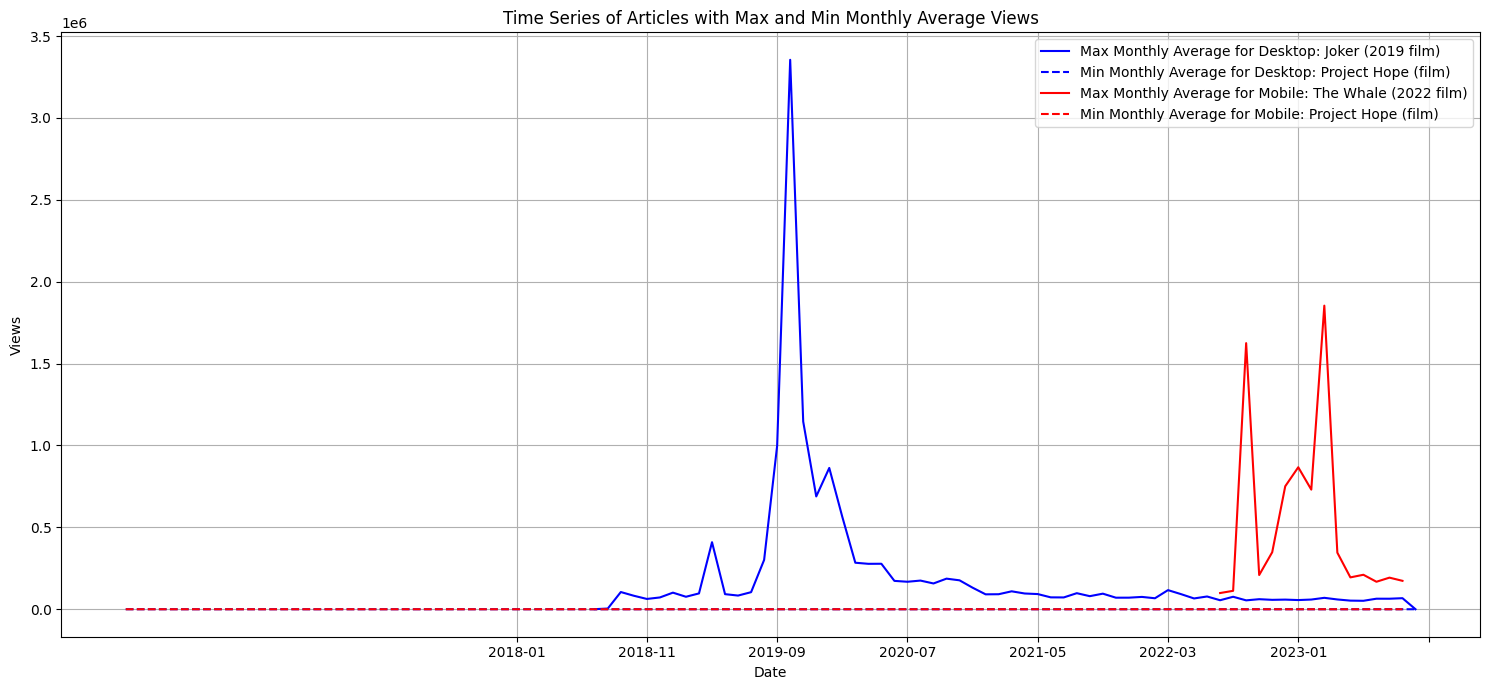

In [34]:
# The plots are plotted using matplolib.pyplot library

# Compute monthly average for each article in both dataframes(i.e desktop and mobile)
average_values_df_desktop = df_desktop.mean(axis=1)
average_values_df_mobile = df_mobile.mean(axis=1)

# Identify articles with max and min monthly average views in df_desktop
article_max_df_desktop = average_values_df_desktop.idxmax()
article_min_df_desktop = average_values_df_desktop.idxmin()

# Identify articles with max and min monthly average views in df_mobile
article_max_df_mobile = average_values_df_mobile.idxmax()
article_min_df_mobile = average_values_df_mobile.idxmin()

# Set the figuresize for the plot
plt.figure(figsize=(15, 7))

# Time series for the articles with max and min average views in df_desktop
df_desktop.loc[article_max_df_desktop].plot(label=f'Max Monthly Average for Desktop: {article_max_df_desktop}', color='blue')
df_desktop.loc[article_min_df_desktop].plot(label=f'Min Monthly Average for Desktop: {article_min_df_desktop}', color='blue', linestyle='--')

# Time series for the articles with max and min average views in df_mobile
df_mobile.loc[article_max_df_mobile].plot(label=f'Max Monthly Average for Mobile: {article_max_df_mobile}', color='red')
df_mobile.loc[article_min_df_mobile].plot(label=f'Min Monthly Average for Mobile: {article_min_df_mobile}', color='red', linestyle='--')

# Add title, labels and legends for the plot. I have also added a grid for the plot for better visualization.
plt.title('Time Series of Articles with Max and Min Monthly Average Views')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Graph 2: Top 10 Peak Page Views - This graph contains time series for the top 10 article pages by largest (peak) page views over the entire time by access type. We first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. The graph contains the top 10 for desktop and top 10 for mobile access (i.e 20 lines)

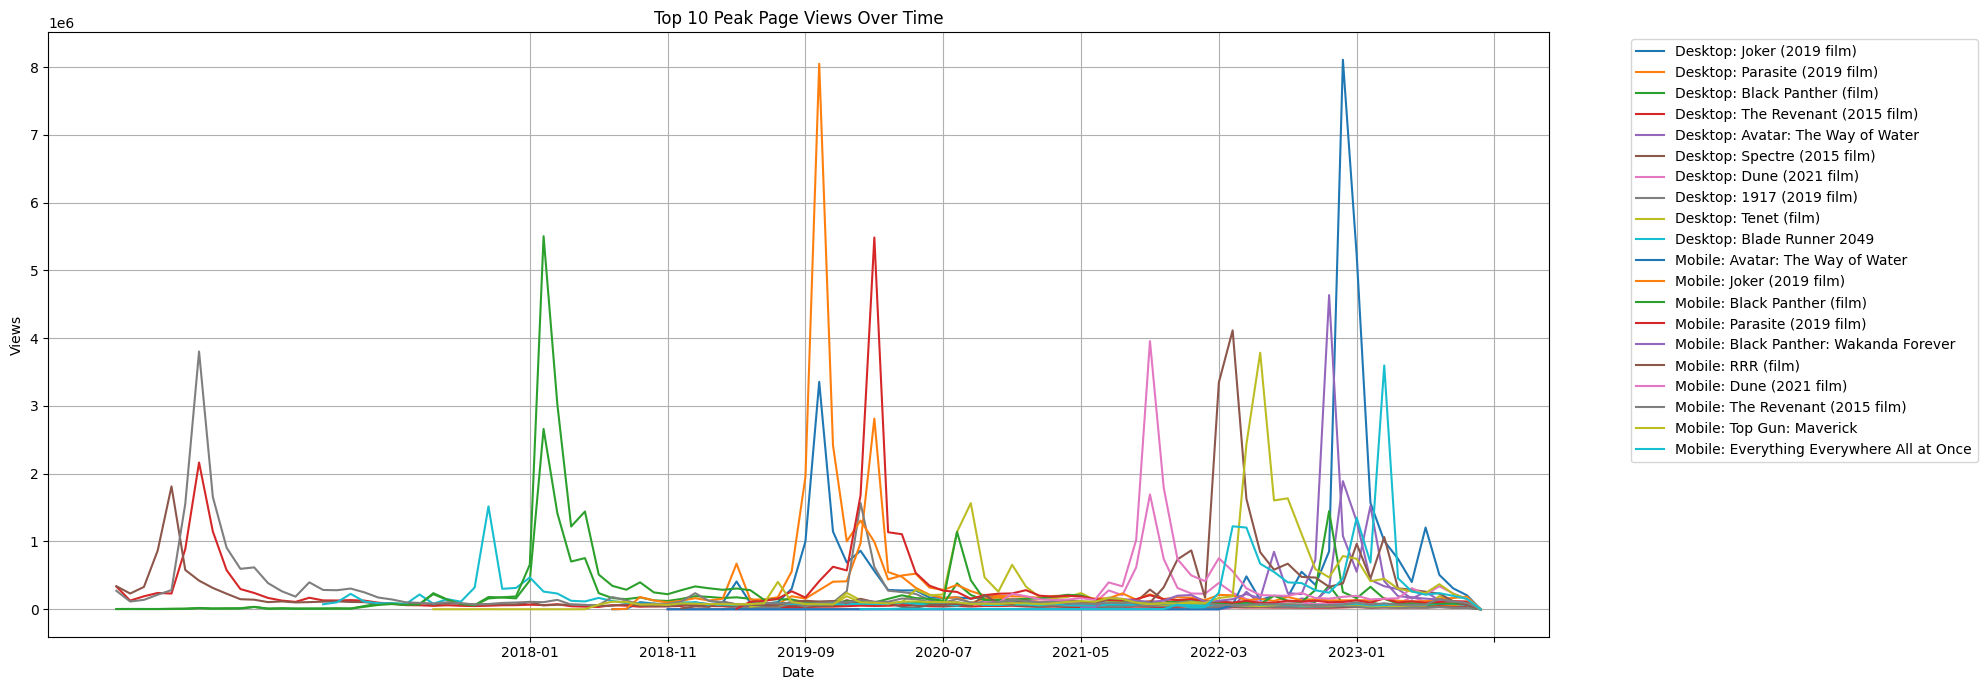

In [41]:
# The plots are plotted using matplolib.pyplot library

# Get the article with the peak views for desktop
df_desktop['peak'] = df_desktop.max(axis=1)
top10_desktop = df_desktop.nlargest(10, 'peak') # getting the top 10

# Get the article with the peak views for mobile
df_mobile['peak'] = df_mobile.max(axis=1)
top10_mobile = df_mobile.nlargest(10, 'peak') # getting the top 10

# Set the figuresize for the plot
plt.figure(figsize=(20, 7))

# Plotting the top 10 for desktop
for article in top10_desktop.index:
    top10_desktop.loc[article].drop('peak').plot(label=f"Desktop: {article}")

# Plotting the top 10 for mobile
for article in top10_mobile.index:
    top10_mobile.loc[article].drop('peak').plot(label=f"Mobile: {article}")

# Add title, labels and legends for the plot. I have also added a grid for the plot for better visualization.
plt.title('Top 10 Peak Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Graph 3: Fewest Months of Data - This graph shows pages that have the fewest months of available data and contains a set of the most recent academy award winners. This graph shows the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

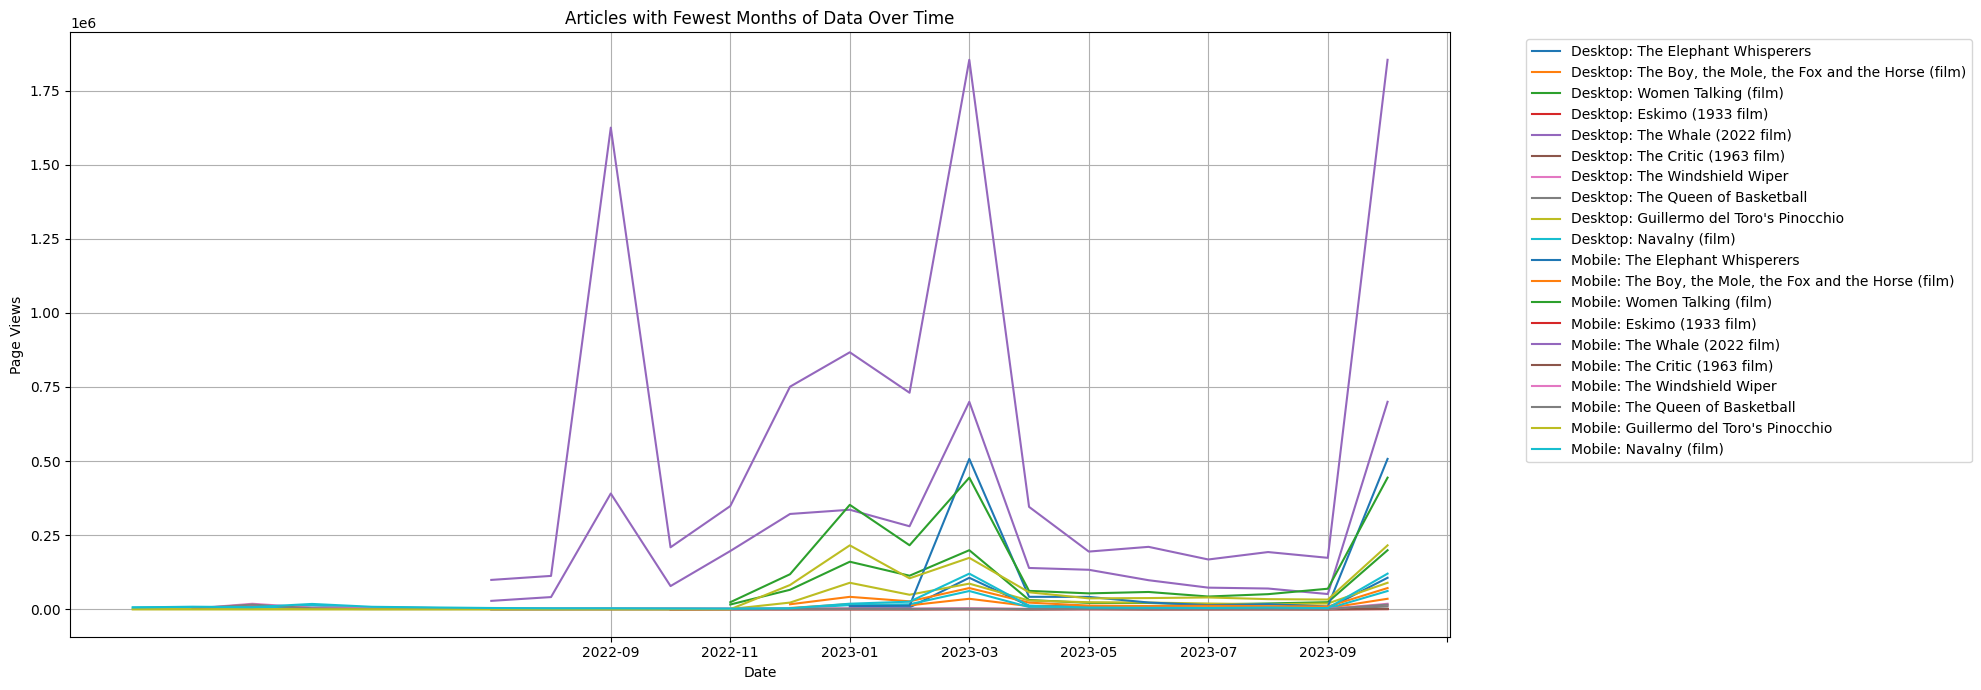

In [40]:
# Count the months that have non-NA values for each article
df_desktop['non_na_count'] = df_desktop.count(axis=1)
df_mobile['non_na_count'] = df_mobile.count(axis=1)

# Get the top 10 articles with fewest data for desktop and mobile
fewest_data_desktop = df_desktop.nsmallest(10, 'non_na_count') # get the fewest 10 for desktop
fewest_data_mobile = df_mobile.nsmallest(10, 'non_na_count') # get the fewest 10 for mobile

# Set the figuresize for the plot
plt.figure(figsize=(20, 7))

# Plot for desktop
for article in fewest_data_desktop.index:
    fewest_data_desktop.loc[article].drop('non_na_count').plot(label=f"Desktop: {article}")

# Plot for mobile
for article in fewest_data_mobile.index:
    fewest_data_mobile.loc[article].drop('non_na_count').plot(label=f"Mobile: {article}")

# Add title, labels and legends for the plot. I have also added a grid for the plot for better visualization.

plt.title('Articles with Fewest Months of Data Over Time')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
#plt.savefig('fewest_data_graph.png', format='png') you can use this line if you want to directly save it as in a png format.
plt.show()